# Principal Component Analysis (PCA)
### Dataset: [Dry_Bean_Dataset.xlsx](../../input/Dry_Bean_Dataset_Citation_Request.txt)

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


<a id="2"></a>
## Loading dataset

In [2]:
filename = '../../input/Dry_Bean_Dataset.xlsx'

df = pd.read_excel(filename)

print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

<a id="3"></a>
## Standardize the data

In [4]:
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity']
target = 'Class'

# extract features (X) and target (y) from the DataFrame
X = df[features].values
y = df[target].values

# standardize the features
X = StandardScaler().fit_transform(X)

<a id="4"></a>
## PCA Projection to 2D

In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

print("Original shape: ", X.shape)
print("Transformed shape:", principal_components.shape)

print(principal_df)

final_df = pd.concat([principal_df, df[['Class']]], axis=1)

print(final_df)

print("Dry Bean Dataset - Unique Classes:", df['Class'].unique())
print("Dry Bean Dataset - Shape of PCA Data:", principal_components.shape)

Original shape:  (13611, 6)
Transformed shape: (13611, 2)
       principal component 1  principal component 2
0                  -2.831638               1.755679
1                  -3.228528               3.030548
2                  -2.689042               1.670730
3                  -2.825887               2.318291
4                  -3.432916               3.713527
...                      ...                    ...
13606              -0.711187              -0.297844
13607              -0.877721               0.134360
13608              -0.877616               0.160700
13609              -0.827530               0.065601
13610              -0.546500              -0.640134

[13611 rows x 2 columns]
       principal component 1  principal component 2     Class
0                  -2.831638               1.755679     SEKER
1                  -3.228528               3.030548     SEKER
2                  -2.689042               1.670730     SEKER
3                  -2.825887               2

<a id="5"></a>
## Explained Variance

In [7]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.12408673 1.76434109]
[0.68729729 0.29403524]


<a id="6"></a>
## Visualize 2D Projection

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']


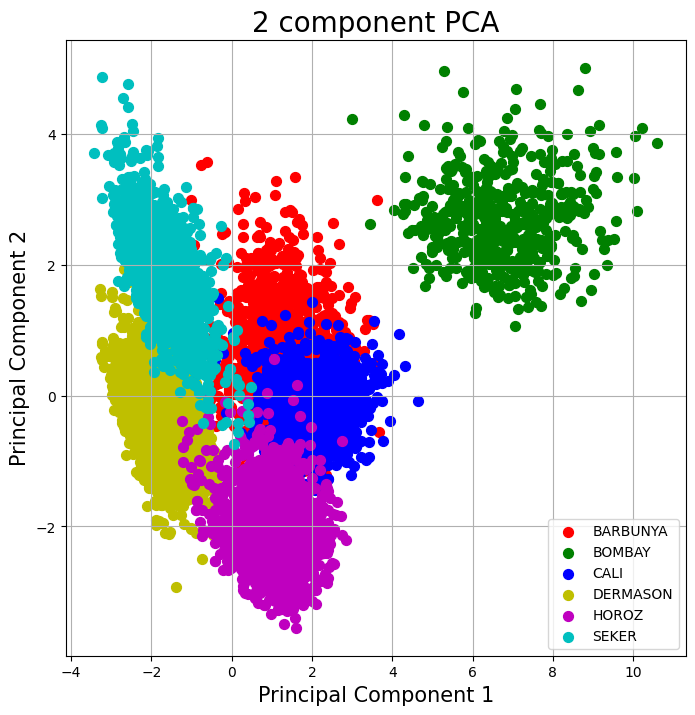

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = sorted(df['Class'].unique())
print(targets)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
for target, color in zip(targets, colors):
    indicesToKeep = final_df['Class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'],
               final_df.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()